<a href="https://colab.research.google.com/github/Maagnitude/fetal_health_models/blob/main/fetal_health_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Βιβλιοθήκες**
Κάνουμε import τα απαραίτητα **modules**. 
*   Την **pandas** και την **numpy** για την διαχείρηση των δεδομένων μας.

*  Την **matplotlib.pyplot** και την **seaborn** για την οπτικοποίηση των δεδομένων μας. **Ιστογράμματα**, **boxplots** κλπ.

*  Την **missingno** ώστε να οπτικοποιήσουμε το αν υπάρχουν ελλιπείς εγγραφές.

*   Από την **sklearn** κάνουμε import:
      *   Την **linear_model** για να εκπαιδεύσουμε το **Logistic Regression model**.
      *   Την **neural_network** για να υλοποιήσουμε και να εκπαιδεύσουμε ΤΝΔ.
      <!-- *   Την **cross_val_score** για να βρούμε την........... -->

      *  Την **StardardScaler** και την **train_test_split** για το **Preprocessing** κομμάτι. Συγκεκριμένα για την τυποποίηση των δεδομένων και για να χωρίσουμε τα δεδομένα μας σε **test data** και **train data**.
      *  Την **metrics** για τις μετρικές που θα χρησιμοποιήσουμε, όπως η **confusion_matrix**.
      *  Την **RandomForestClassifier** για να εκπαιδεύσουμε ένα Random Forest model.

*  Τέλος κάνουμε import τα **warnings** και τα φιλτράρουμε, ώστε να μην εμφανίζονται.










In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn import linear_model
from sklearn import neural_network
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow import keras
from keras import layers

import warnings
warnings.filterwarnings(action='ignore')

# **read_csv**
Περνάμε το url του dataset στην μεταβλητή df με την χρήση της μεθόδου read_csv, και εκτυπώνουμε τις 5 πρώτες γραμμές για να δούμε ότι έγιναν όλα σωστά.

In [2]:
url = "https://raw.githubusercontent.com/Maagnitude/fetal_health_models/main/fetal_health.csv"
df = pd.read_csv(url)
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


# **Drive mount**
Το παρακάτω block κώδικα το έχω κάνει comment γιατί θα ανεβάζω το dataset μέσω του **github url**, από το repository μου. 

Απλά μέσω του google drive έπαιρνα το dataset, πριν φτιάξω το repository, οπότε το άφησα να υπάρχει σαν επιλογή.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# path = "/content/drive/MyDrive/Colab Notebooks/fetal_health.csv"
# df = pd.read_csv(path, keep_default_na=False)
# df.head()

In [4]:
print("Table's shape is: ", df.shape[0], " rows x ", df.shape[1], " columns.")

Table's shape is:  2126  rows x  22  columns.


# **Info**
Με την **info()** τυπώνουμε την συνοπτική περίληψη του dataframe. Συγκεκριμένα τυπώνουμε τον τύπο δεδομένων των στηλών και πόση μνήμη χρησιμοποιείται. Επίσης παρατηρούμε ότι δεν έχουμε missing values, καθώς όλες οι στήλες έχουν **2126** τιμές και είναι **non-null**. Το βλέπουμε και πιο καθαρά με την **isna().sum()** πατακάτω, που αφορά και τις NaN τιμές.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [6]:
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

# **Οπτική απόδειξη**
Με την χρήση της συνάρτησης **bar()** της βιβλιοθήκης **missingno**, βλέπουμε ότι **δεν υπάρχουν** ελλιπείς εγγραφές, καθώς οι μπάρες σε κάθε χαρακτηριστικό φτάνουν στο 1.0

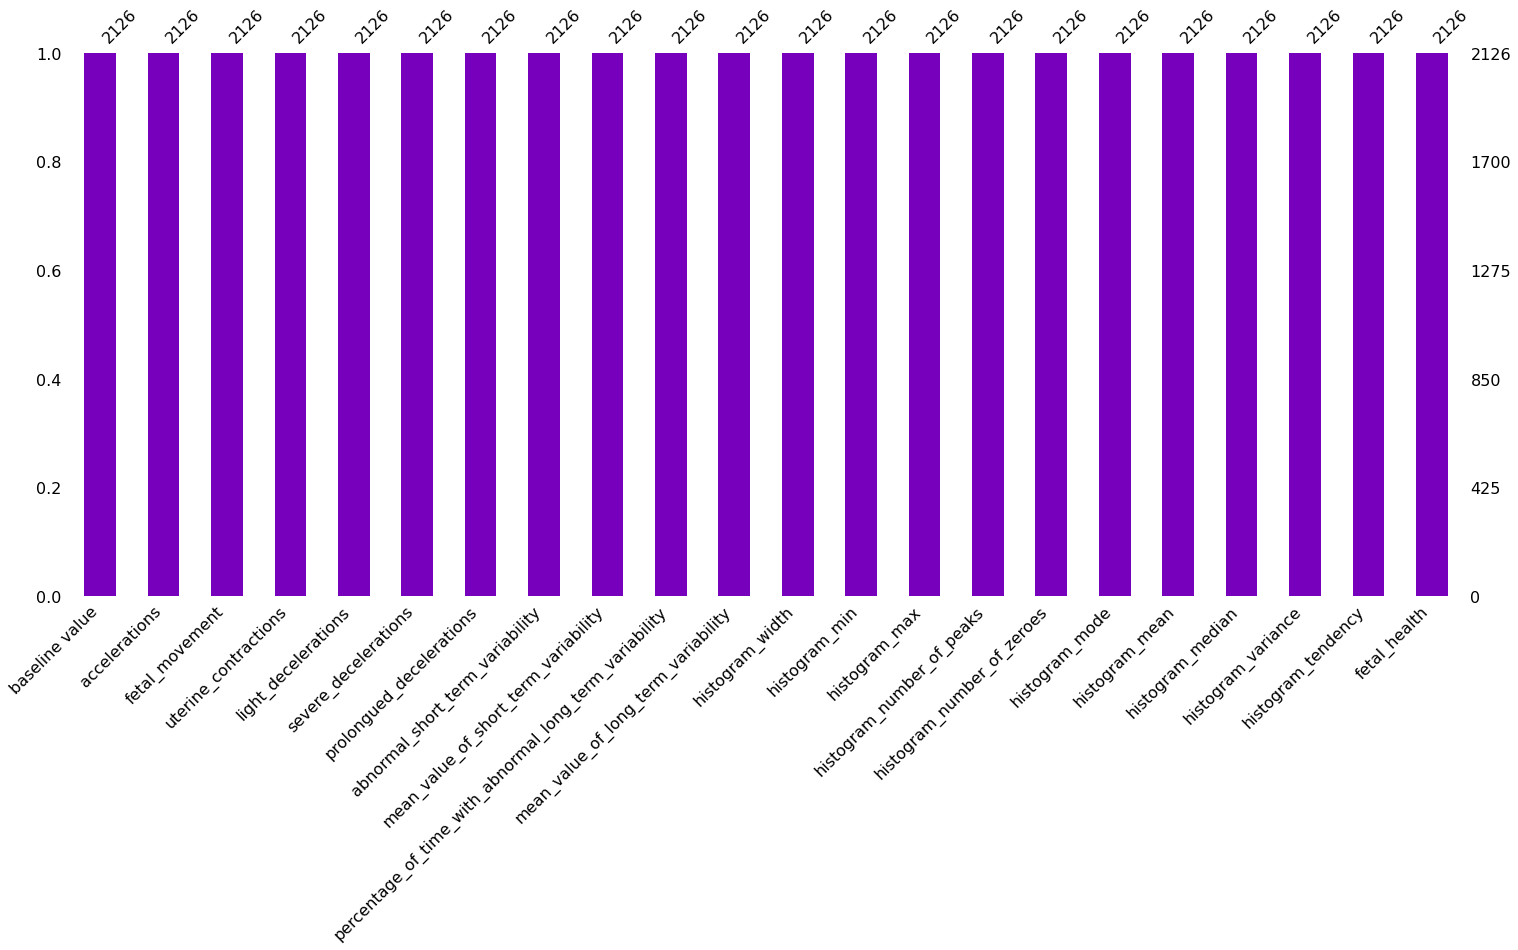

In [7]:
null_plot = msno.bar(df, color="#7600BC")

# **Δεν υπάρχουν λοιπόν ελλιπείς εγγραφές.**
Με την χρήση της συνάρτησης **isnull()** της βιβλιοθήκης **pandas**, θα αποδείξουμε ότι **δεν υπάρχουν ελλιπείς εγγραφές**, δηλαδή ότι έχουμε ένα **πλήρες** σύνολο δεδομένων, όπως είδαμε και πιο πάνω με την **info()** αλλά και το διάγραμμα.

In [8]:
print("Are there missing values? ", "Yes" if (df.isnull().values.any()) else "No")

Are there missing values?  No


Με την **copy()** δημιουργούμε ένα αντίγραφο της **df** για να το χρησιμοποιήσουμε στην **διερεύνηση των δεδομένων** **(EDA)**, ώστε να μην πειράξουμε το αρχικό **dataframe**.

In [4]:
eda_df = df.copy()

# **Ιστόγραμμα**
Εδώ τυπώνουμε το **Ιστόγραμμα** κάθε χαρακτηριστικού, με την μέθοδο **hist()**, και τα καταχωρούμε στην μεταβλητή **df_histplot**. Αυτό που μπορούμε να παρατηρήσουμε εδώ είναι ότι το χαρακτηριστικό baseline_value είναι όσο πιο κοντά σε **κανονική κατανομή** σε αντίθεση με τα άλλα χαρακτηριστικά. Στα περισσότερα παρατηρείται **θετική ασυμμετρία**, και σε λίγα (κυρίως histogram_mode, histogram_mean, histogram_median) παρατηρείται **αρνητική ασυμμετρία**, και λογικά μιας και έχουν μεγάλη συσχέτιση μεταξύ τους αυτά, όπως θα δούμε και παρακάτω.

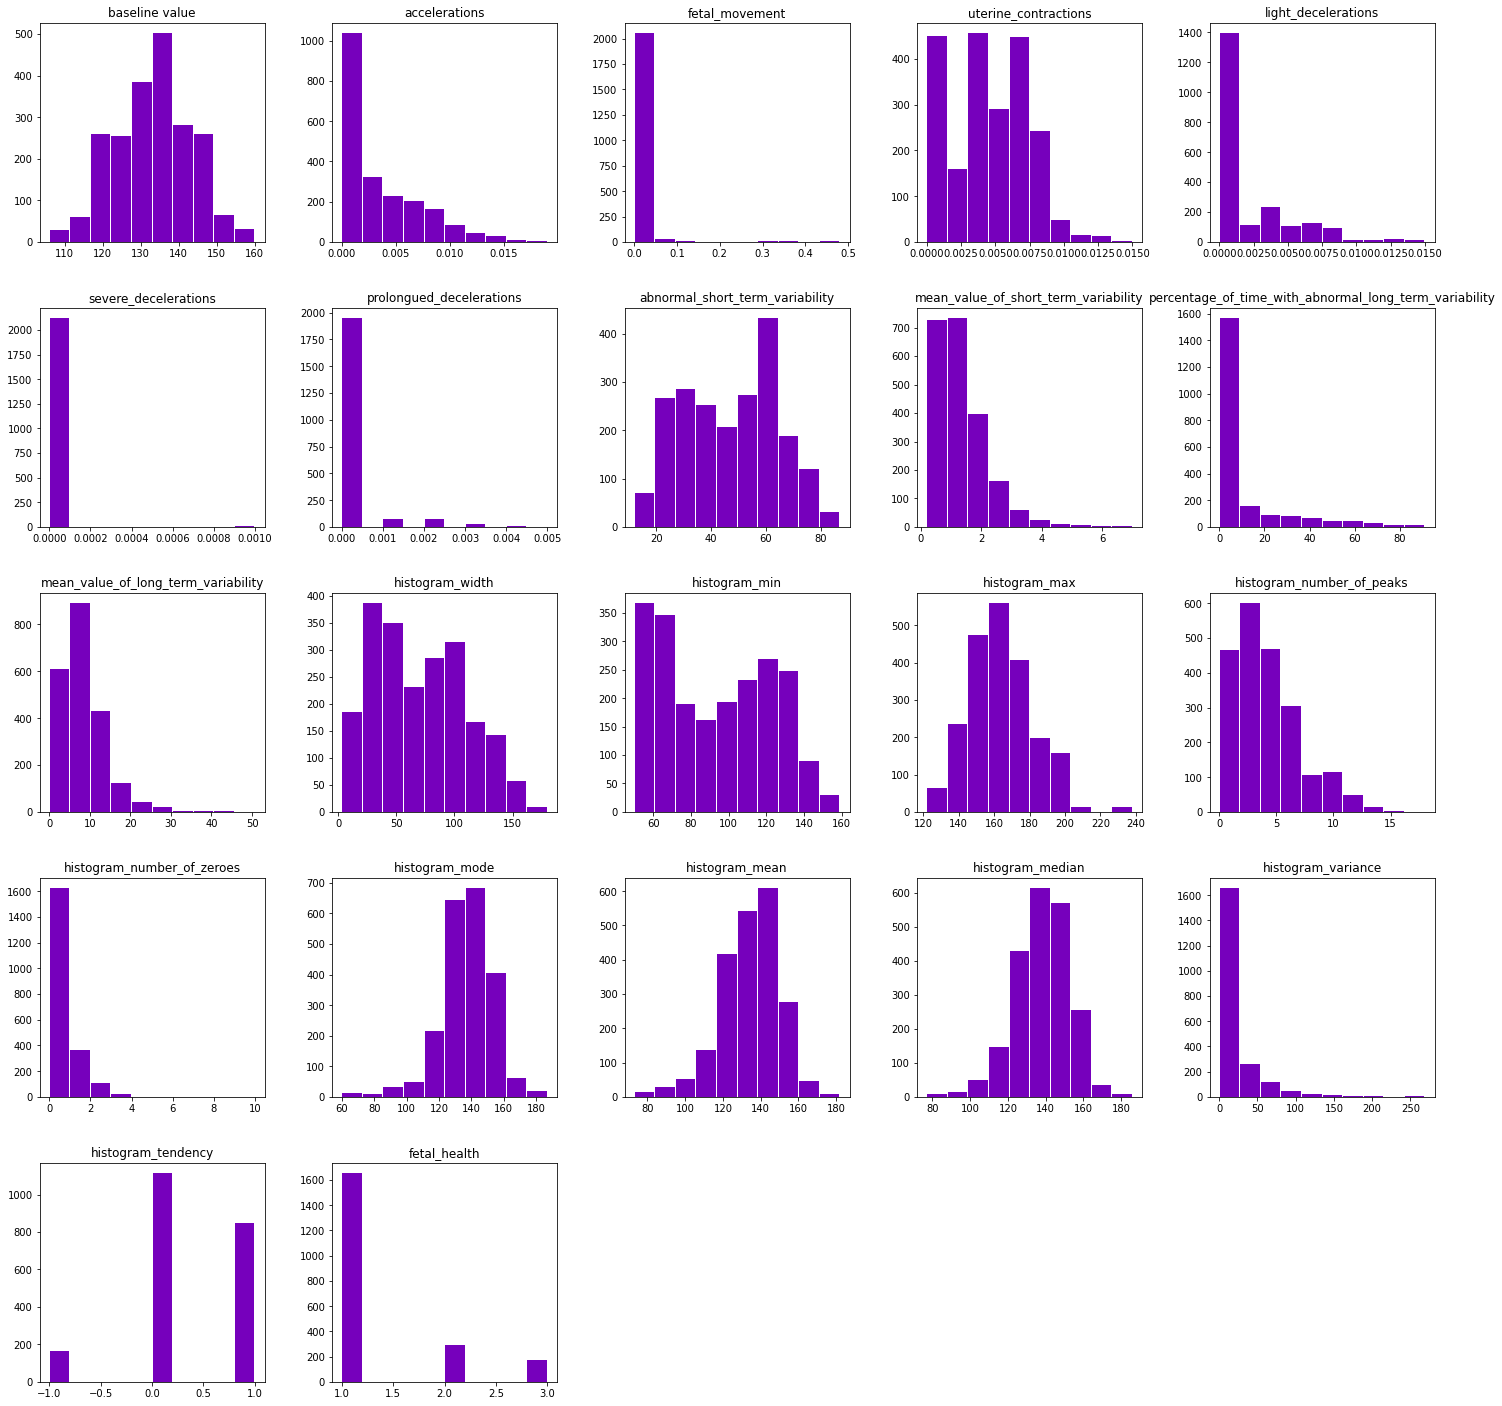

In [10]:
edadf_histplot = eda_df.hist(grid=False, figsize=(25,25), color='#7600BC', zorder=2, rwidth=0.95)

# **Describe**
Παρακάτω εμφανίζουμε την στατιστική ανάλυση των δεδομένων μας, με την χρήση της μεθόδου describe(). Παρατηρούμε ότι το 75% των δειγμάτων μας ανήκει στην κατηγορία 1 του fetal_health, δηλαδή 'φυσιολογικό'. Επίσης η στατιστική ανάλυση αφορά και τις 22 στήλες, μιας και έχουμε μόνο αριθμητικά χαρακτηριστικά, κι έτσι θα είναι και πιο εύκολη η επεξεργασία των δεδομένων και η υλοποίηση των μοντέλων μας.

Σημ: Με **Transpose (.T)** ο πίνακας είναι πιο ευκρινής. Στην αρχή τον είχα αλλιώς, και ήταν κουραστικό.

In [11]:
eda_df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


# **Υπολογισμός**
Εδώ υπολογίζουμε με ακρίβεια πόσες από τις εγγραφές ανήκουν σε κάθε **κατηγορία**, ελέγχοντας αν ο αριθμός σε κάθε εγγραφή είναι 0, 1 ή 2, για **normal**, **suspect** ή **pathological**.
Ύστερα ανακάλυψα ότι υπάρχει συνάρτηση για κάτι τέτοιο. Η **value_counts()**, οπότε τσάμπα έγραψα το παρακάτω **μπλοκ**. Βγάζει όμως το ίδιο αποτέλεσμα και το κράτησα κι αυτό για τον κόπο μου.

In [5]:
normal = 0
suspect = 0
pathol = 0
for i in range(eda_df.shape[0]):  
  if (eda_df["fetal_health"][i] == 1):
    normal += 1
  elif (eda_df["fetal_health"][i] == 2):
    suspect += 1
  else:
    pathol += 1

print("Normal       (1.0) = ", normal)
print("Suspect      (2.0) = ", suspect)
print("Pathological (3.0) = ", pathol, "\n")

#OR

print(eda_df["fetal_health"].value_counts())

Normal       (1.0) =  1655
Suspect      (2.0) =  295
Pathological (3.0) =  176 

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64


# **Category Pie Plot**
Εδώ οπτικοποιούμε τα αποτελέσματα του προηγούμενου υπολογισμού, σε ένα διάγραμμα πίτας, βάζοντας και τα ποσοστά, ώστε να δούμε πόσες εγγραφές έχουμε σε κάθε κατηγορία σε σχέση με το σύνολο.
Παρατηρούμε ότι έχουμε μεγάλο ποσοστό **Normal**, όπως είδαμε και τον υπολογισμό παραπάνω, που σημαίνει ότι το σύνολο δεδομένων **δεν είναι ισορροπημένο**, μιας και απ τις 3 κατηγορίες (classes) η πρώτη καταλαμβάνει το **77.85%**

<function matplotlib.pyplot.show(*args, **kw)>

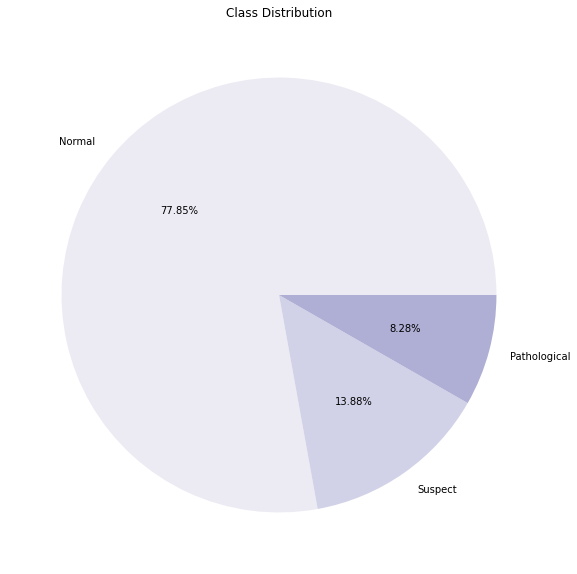

In [6]:
plt.figure(figsize=(10, 10))

plt.pie(
    eda_df['fetal_health'].value_counts(),
    labels=["Normal", "Suspect", "Pathological"],
    autopct='%.2f%%',
    colors=sns.color_palette('Purples')
)

plt.title("Class Distribution")
plt.show

#**Boxplot**

Ύστερα τυπώνουμε το **boxplot** κάθε χαρακτηριστικού με τη χρήση της συνάρτησης **boxplot()** της βιβλιοθήκης **seaborn**. Παρατηρούμε ότι έχουμε μια σωστή οπτικοποίηση της στατιστικής ανάλυσης που κάναμε παραπάνω μιας και σ ένα θηκόγραμμα μπορούμε να διαβάσουμε 5 τιμές. Τέρμα πάνω έχουμε τη μέγιστη τιμή, και τέρμα κάτω την ελάχιστη. Στην πάνω πλευρά του 'κουτιού' βρίσκεται το 75% των δειγμάτων, στην κάτω πλευρά το 25% και στην γραμμή που βρίσκεται εντός του κουτιού έχουμε το 50%. Πολύ σωστά λοιπόν η γραμμή αυτή στο fetal_health, βρίσκεται πάνω στην τιμή 1, και δεν υπάρχει κουτί μιας και το 75% των δειγμάτων παρουσιάζουν fetal_health ίσο με 1.

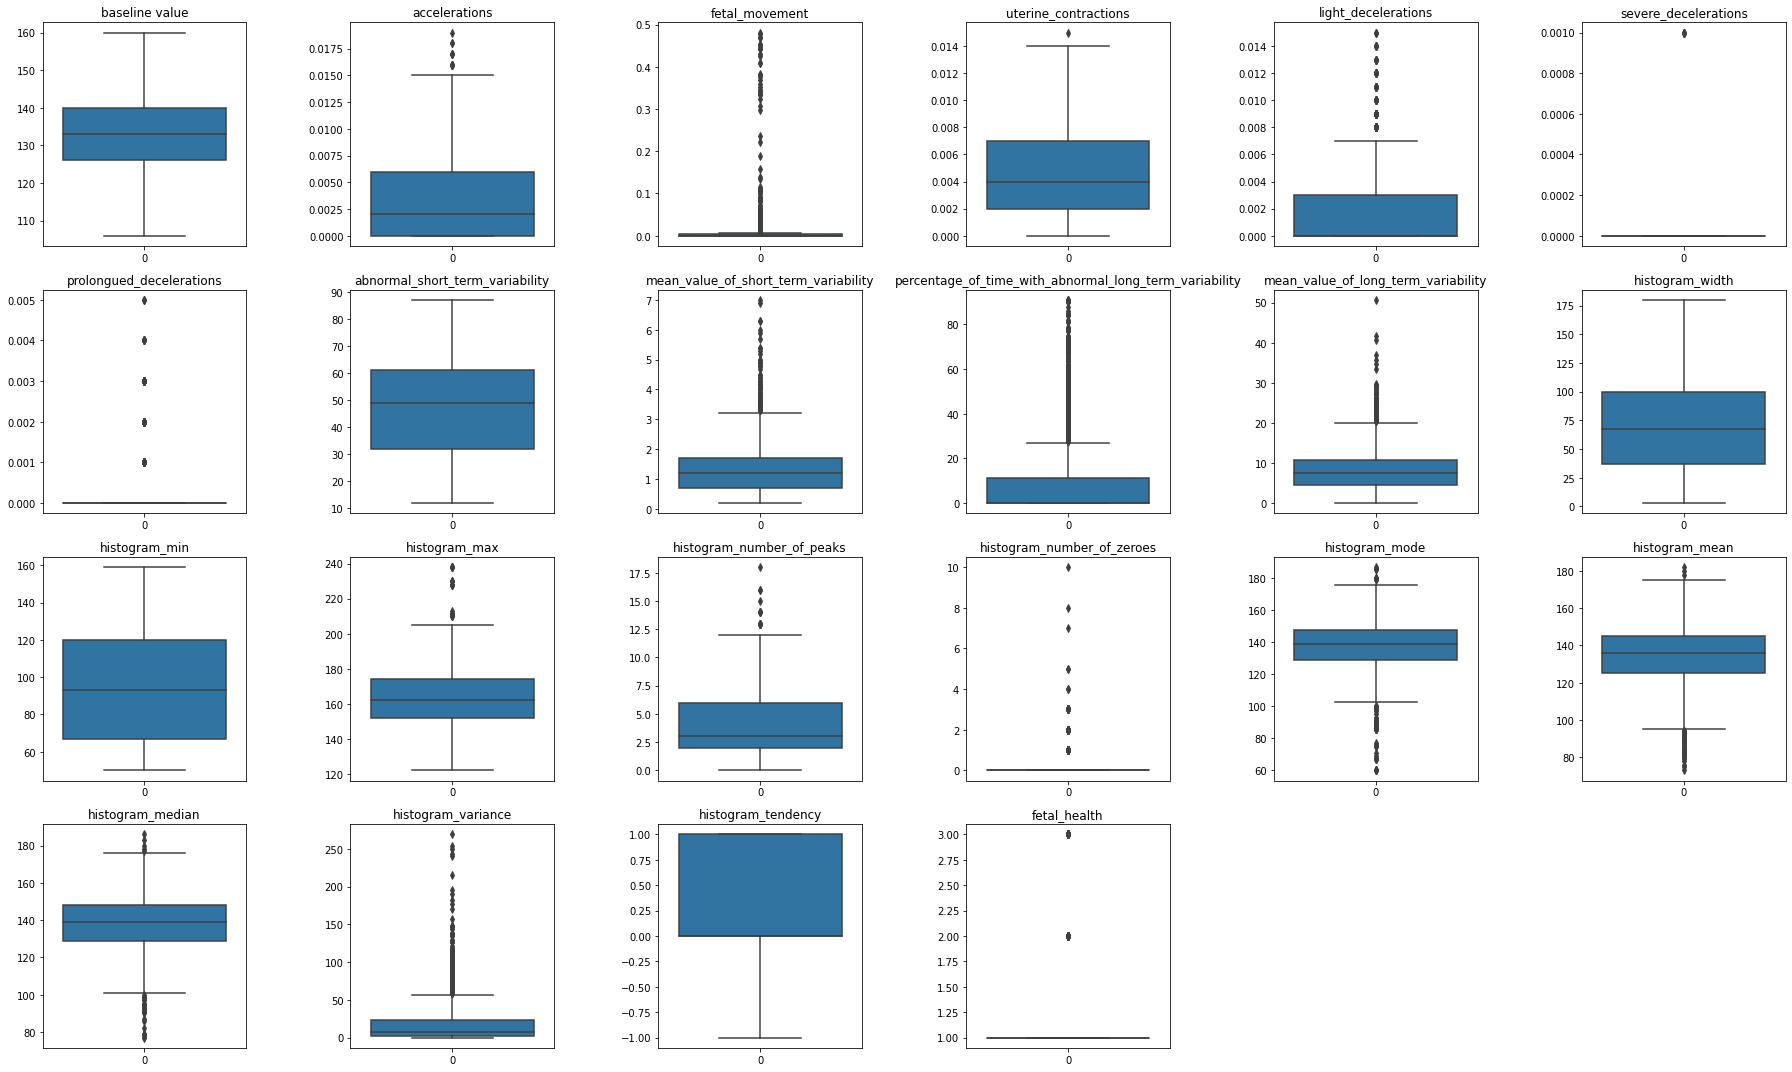

In [7]:
plt.figure(figsize=(25, 15))

for i, column in enumerate(eda_df.columns):
  plt.subplot(4, 6, i + 1)
  sns.boxplot(data=eda_df[column])
  plt.title(column)

plt.tight_layout()
plt.show()

# **Ετεροσυσχέτιση**
Με την χρήση της συνάρτησης **corr()** της βιβλιοθήκης **pandas**, ελέγχουμε την **ετεροσυσχέτιση** μεταξύ των χαρακτηριστικών.

In [8]:
corr = eda_df.corr()

# **Heatmap**
Εδώ οπτικοποιούμε την **ετεροσυσχέτιση** των χαρακτηριστικών. Αυτήν η δισδιάστατη αναπαράσταση μας βοηθάει να καταλάβουμε πολύ πιο εύκολα την ετεροσυσχέτιση, μέσω των χρωμάτων, αλλά και των τιμών. Παρατηρούμε ότι η ισχυρότερη συσχέτιση με το **fetal health** είναι το **prolonged decelerations** (**0.48**)

Παρατηρούμε και αυτό που είδαμε πιο πάνω. Ότι τα χαρακτηριστικά histogram_mode, histogram_mean, histogram_median έχουν τεράστια ετεροσυσχέτιση μεταξύ τους, αλλά πολύ μικρή ετεροσυσχέτιση με το fetal_health (-0.21, -0.23, -0.25), και επειδή ήταν και αυτά που έχουν αρνητική ασσυμετρία, θα δοκιμάσω να τα αφαιρέσω για να δούμε αν το μοντέλο εκπαιδευτεί καλύτερα.

In [ ]:
plt.figure(figsize=(20,15))
heat = sns.heatmap(corr, annot=True, vmin=-1.0, cmap='PuBu')
plt.title("Correlation Matrix\n")
plt.show()

# Υλοποίηση συνάρτησης για **preprocessing**

Εντός αυτής, χωρίζουμε τα δεδομένα σε train και test sets, μέσω της train_test_split με 70% train και 30% test, και random_state 42. Ύστερα τα κάνουμε scale με τον StandardScaler().

In [11]:
def preprocessing_func(fitdf):

  # Split fitdf into X and y
  y = fitdf['fetal_health']
  X = fitdf.drop('fetal_health', axis=1)

  # Train-test split
  X_train, X_test, y_train, y_test = \
  train_test_split(X, y, train_size=0.7, random_state=42)

  # Scaling X
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_std = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
  X_test_std = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

  return X_train_std, X_test_std, y_train, y_test

# Υλοποίηση συνάρτησης για την **εκπαίδευση γραμμικού μοντέλου**

Θα την χρησιμοποιήσουμε δίνοντας της τα χωρισμένα **train** και **test sets**, ώστε να εκπαιδευτεί (**fit**) στα train και ύστερα να εξεταστεί στο test (**score**) ώστε να πάρουμε το **accuracy**. Με την **predict** θα πάρουμε όλες τις τιμές που πρόβλεψε ώστε να φτιάξουμε τον **confusion matrix**. 

In [12]:
def run_linear_sklearn(X_train, X_test, y_train, y_test):

  # Training the model
  lr = linear_model.LogisticRegression()
  model = lr.fit(X_train, y_train)

  # Testing the model
  # score = round(model.score(X_test, y_test), 3)
  y_hat_test = model.predict(X_test)
  accuracy = round(metrics.accuracy_score(y_test, y_hat_test), 3)

  # Calculating the confusion matrix
  confmatrix = confusion_matrix(y_test, y_hat_test)

  return accuracy, confmatrix
  

# Υλοποίηση συνάρτησης για τον σχεδιασμό του **Confusion Matrix**

Με χρήση ενός heatmap θα παρουσιάσουμε τα αποτελέσματα του υπολογισμένου confusion matrix, όπου βάζουμε τις παραμέτρους annot=True και annot_kws={'size':20} για να εμφανίσουμε τις τιμές σε κάθε περιοχή του πίνακα, και να έχουν μέγεθος 20. Επίσης, η παράμετρος fmt="d" είναι για να εμφανίζονται οι τιμές ως ακέραιοι. (Γιατί χωρίς αυτήν, το 466 εμφανιζόταν ως 4.7e+02)

Τέλος, με την axis.tick_top() βάζουμε τα labels του άξονα x στην κορυφή του plot.

In [65]:
def heat_confmatrix (confmatrix):

  if confmatrix.shape[0] == 4:
    tf.imshow(confmatrix)
  
  labels = ['Normal', 'Suspicious', 'Pathological']

  # Giving the labels we made to the matrix
  conf_matr_plt = pd.DataFrame(confmatrix, index = labels, columns = labels)

  
  plt.subplots(figsize=(12, 10))
  
  ax = sns.heatmap(conf_matr_plt, cmap='viridis', annot=True, annot_kws={'size':20}, fmt="d")

  ax.xaxis.tick_top()
  ax.set_title("Confusion Matrix\n")
  plt.ylabel('True')
  plt.xlabel('Predicted')

  plt.show()

## **Δημιουργία αντίγραφου του Dataframe μας**

Φτιάχνουμε το **fitdf**, ώστε να μην πειράξουμε το αρχικό dataframe μας. Όλες οι αλλαγές θα γίνουν πάνω σ αυτό.

In [14]:
fitdf = df.copy()

# **Δοκιμή χωρίς scaling**

Για αρχή θα εκπαιδεύσουμε το μοντέλο μας, χωρίς να πειράξουμε τα δεδομένα και χωρίς να κάνουμε scaling. 

In [ ]:
# Split fitdf into X and y
y = fitdf['fetal_health']
X = fitdf.drop('fetal_health', axis=1)

# Train-test split
X_train, X_test, y_train, y_test = \
train_test_split(X, y, train_size=0.7, random_state=42)

# Training the model
logistic_regression = linear_model.LogisticRegression()
logistic_regression_mod = logistic_regression.fit(X_train, y_train)

# Testing the model
accuracy = round(logistic_regression_mod.score(X_test, y_test), 2)

# Creating the confusion matrix
y_pred = logistic_regression_mod.predict(X_test)
confmatrix = confusion_matrix(y_test, y_pred)

# **85%**

Το **accuracy** δεν είναι κακό αλλά θα δούμε παρακάτω ότι μπορεί να γίνει καλύτερο.

In [ ]:
print(f"Model's accuracy without scaling: {accuracy*100}%")

Model's accuracy without scaling: 85.0%


In [76]:
print(f'Confusion matrix without scaling:\n {confmatrix}')

Confusion matrix without scaling:
 [[466  25   5]
 [ 25  63  13]
 [  3   4  34]]


Τώρα με τη χρήση της συνάρτησης που φτιάξαμε θα γίνει το scaling και θα παρατηρήσουμε αύξηση του accuracy στην επόμενη εκπαίδευση του μοντέλου.

In [20]:
X_train, X_test, y_train, y_test = preprocessing_func(fitdf)

In [21]:
accuracy, confmatrix = run_linear_sklearn(X_train, X_test, y_train, y_test)

# **88.2%**

Πράγματι ανέβηκε κατά 3.2%

Πάμε τώρα να το κάνουμε ακόμα καλύτερο.

In [17]:
print(f"Model's accuracy after scaling: {accuracy*100}%")

Model's accuracy after scaling: 88.2%


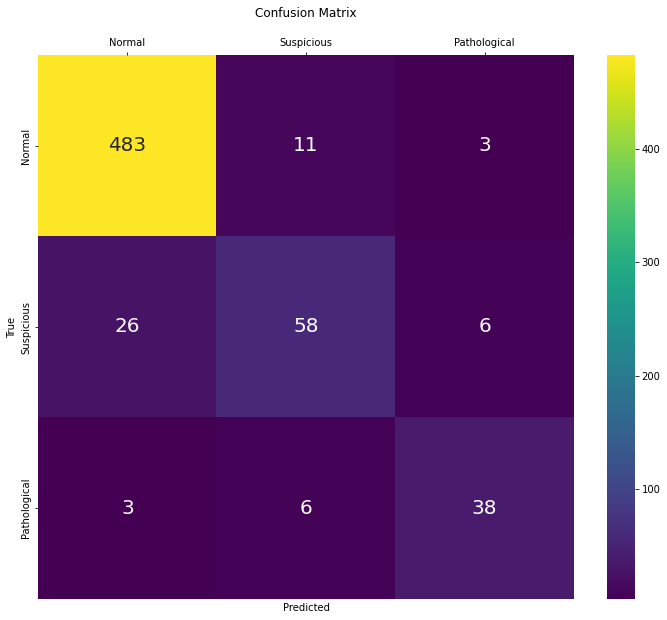

In [66]:
heat_confmatrix(confmatrix)

In [23]:
fitdf['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

Αν θεωρήσουμε τους '**ύποπτους για παθολογία**' και τους '**παθολογικούς**' ως μία κατηγορία, μειώνοντας τις τιμές που μπορεί να πάρει η fetal_health σε μόλις 2, τότε με τον παρακάτω κώδικα κάνουμε το χαρακτηριστικό αυτό να είναι ή 0 ή 1.

Σημ: Σίγουρα θα υπάρχει πιο εύκολος τρόπος αλλαγή των τιμών, αλλά αυτός μου ήρθε πρώτος.

In [24]:
i=0
for i in range(fitdf['fetal_health'].shape[0]):
  if fitdf['fetal_health'][i] == 3.0:
    fitdf['fetal_health'][i] = 1
  elif fitdf['fetal_health'][i] == 2.0:
    fitdf['fetal_health'][i] = 1
  else:
    fitdf['fetal_health'][i] = 0
  i += 1

Όπως βλέπουμε εδώ, οι τιμές μοιράστηκαν. Έτσι το χαρακτηριστικό μας είναι λίγο περισσότερο ισορροπημένο.

In [25]:
fitdf['fetal_health'].value_counts()

0.0    1655
1.0     471
Name: fetal_health, dtype: int64

# **90.6%**
και το accuracy ανέβηκε ακόμα 2.4%

In [26]:
X_train, X_test, y_train, y_test = preprocessing_func(fitdf)
accuracy, confmatrix = run_linear_sklearn(X_train, X_test, y_train, y_test)
print(f"Model's accuracy after scaling and merging: {accuracy*100:.1f}%\n")
print(f'Confusion matrix after scaling and merging:\n {confmatrix}')

Model's accuracy after scaling and merging: 90.6%

Confusion matrix after scaling and merging:
 [[460  36]
 [ 24 118]]


Ίσως δεν είναι απόλυτα σωστό να ενώσουμε τις δύο κατηγορίες (2 και 3) οπότε θα ξεκινήσουμε πάλι με αντίγραφο του αρχικού dataset και θα επεξεργαστούμε λίγο τα δεδομένα μας, ώστε να πετύχουμε κάτι πάνω απ το 90.6% που πετύχαμε ακριβώς από πάνω.

Αυτό που θα μας ανεβάσει κι άλλος το **accuracy** θα είναι να πετάξουμε τυχόν **διπλότυπα**, μιας και αυτά είναι περιττά για την εκπαίδευση και το μόνο που πετυχαίνουν είναι να **υπερεκπαιδεύσουν** το μοντέλο μας.

Επίσης αφαιρούμε τα χαρακτηριστικά histogram_mean, histogram_mode και histogram_median που είδαμε πιο πάνω ότι η ετεροσυσχέτιση τους με το fetal_health είναι πάρα πολύ μικρή.

In [27]:
fitdf = df.copy()

In [ ]:
fitdf.shape

(2126, 22)

In [28]:
#fitdf = fitdf.drop(['histogram_mean', 'histogram_mode', 'histogram_median'], axis = 1)
fitdf.drop_duplicates(inplace=True)
fitdf.shape

(2113, 22)

# **91.8%**
Παρατηρούμε ότι αφαιρώντας **13 διπλότυπα δείγματα** και τα τρία χαρακτηριστικά που ανέφερα, το accuracy ανέβηκε στο **91.8%**, το οποίο είναι ικανοποιητικό.

Model's accuracy after scaling, merging and dupl_dropping: 91.3%



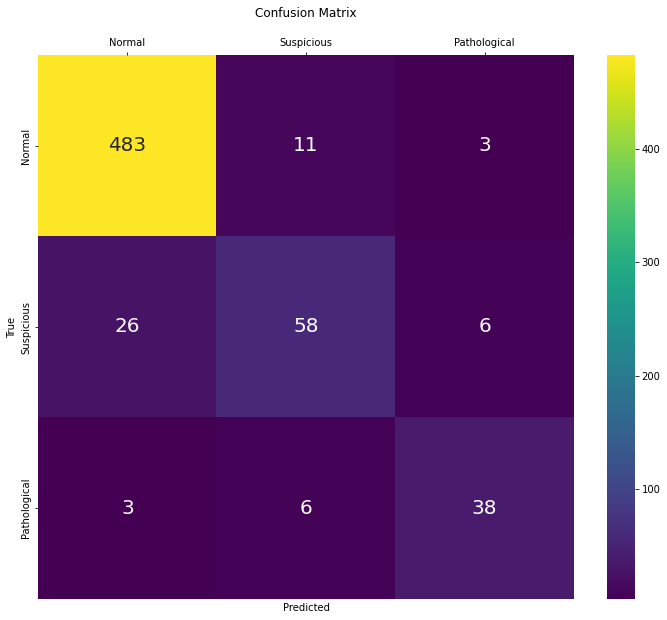

In [54]:
X_train, X_test, y_train, y_test = preprocessing_func(fitdf)
accuracy, confmatrix = run_linear_sklearn(X_train, X_test, y_train, y_test)
print(f"Model's accuracy after scaling, merging and dupl_dropping: {accuracy*100:.1f}%\n")
heat_confmatrix(confmatrix)

# **Tensorflow**
Δημιουργία συνάρτησης για την εκπαιδεύση νέου γραμμικού μοντέλου.

In [72]:
def run_linear_tf(X_train, X_test, y_train, y_test):
  model = tf.keras.Sequential([
      tf.keras.layers.Dense(100, activation='softmax', input_shape=(X_train.shape[1],))
  ])

  model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=keras.optimizers.SGD(),
    metrics=['accuracy']
  )
  model.summary()

  history = model.fit(X_train, y_train, epochs=50)
  accuracy = model.evaluate(X_test, y_test)

  y_test_c = tf.keras.utils.to_categorical(y_test)

  y_pred = model.predict(X_test)
  pred_idx = np.argmax(y_pred, axis=1)
  true_idx = np.argmax(y_test_c, axis=1)
  tf_confmatrix = tf.math.confusion_matrix(true_idx, pred_idx, num_classes=4)

  return accuracy, tf_confmatrix

In [73]:
accuracy, tf_confmatrix = run_linear_tf(X_train, X_test, y_train, y_test)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               2200      
                                                                 
Total params: 2,200
Trainable params: 2,200
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
47/47 [==============================] - 0s 2ms/step - loss: 4.4803 - accuracy: 0.0365
Epoch 2/50
47/47 [==============================] - 0s 2ms/step - loss: 4.0159 - accuracy: 0.2542
Epoch 3/50
47/47 [==============================] - 0s 2ms/step - loss: 3.5702 - accuracy: 0.5139
Epoch 4/50
47/47 [==============================] - 0s 2ms/step - loss: 3.1565 - accuracy: 0.6876
Epoch 5/50
47/47 [==============================] - 0s 2ms/step - loss: 2.7863 - accuracy: 0.7498
Epoch 6/50
47/47 [==============================] - 0s 2ms/step - loss: 2.4633 - accuracy:

In [33]:
print("Test loss:", accuracy[0])
print("Test accuracy:", accuracy[1])

Test loss: 0.3546518087387085
Test accuracy: 0.8943217396736145


In [37]:
y_test

601     2.0
2005    1.0
427     1.0
291     2.0
197     2.0
       ... 
1750    3.0
948     1.0
523     1.0
817     2.0
339     3.0
Name: fetal_health, Length: 634, dtype: float64

In [57]:
confmatrix.dtype

dtype('int64')

In [56]:
tf_confmatrix.dtype

tf.int32

In [ ]:
!pip install tensorflow-graphics

In [75]:
heat_confmatrix(tf_confmatrix)

AttributeError: ignored

# 2.5 Σχεδιασμός αρχιτεκτονικής νευρωνικού δικτύου

Δημιουργούμε ένα ΤΝΔ με 4 κρυφά επίπεδα 100 νευρώνων, με συνάρτηση ενεργοποίησης ReLU, Adam optimizer με ρυθμό εκμάθησης 0.001 και 100 εποχές εκπαίδευσης.

In [76]:
def run_linear_tf2(X_train, X_test, y_train, y_test):
  model = keras.Sequential([
      layers.Input(shape=X_train.shape[1], name='input'),
      layers.Dense(100, activation='relu'),
      layers.Dense(100, activation='relu'),
      layers.Dense(100, activation='relu'),
      layers.Dense(100, activation='relu'),
      layers.Dense(4, activation='softmax', name='output')      
  ])

  model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
  )
  model.summary()
  history = model.fit(X_train, y_train, epochs=100, batch_size = 128)
  accuracy = model.evaluate(X_test, y_test)

  y_test_c = tf.keras.utils.to_categorical(y_test)

  y_pred = model.predict(X_test)
  pred_idx = np.argmax(y_pred, axis=1)
  true_idx = np.argmax(y_test_c, axis=1)
  tf_confmatrix = tf.math.confusion_matrix(true_idx, pred_idx)

  return accuracy, tf_confmatrix

In [77]:
accuracy, tf_confmatrix = run_linear_tf2(X_train, X_test, y_train, y_test)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               2200      
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 output (Dense)              (None, 4)                 404       
                                                                 
Total params: 32,904
Trainable params: 32,904
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
12/12 [==============================]

In [78]:
tf_confmatrix

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[  0,   0,   0,   0],
       [  0, 484,  12,   1],
       [  0,  20,  61,   9],
       [  0,   2,   3,  42]], dtype=int32)>

# Model **evaluation** on test set

In [79]:
print("Test loss:", accuracy[0])
print("Test accuracy:", accuracy[1])

Test loss: 0.46654200553894043
Test accuracy: 0.92586749792099


# Random Forest Classification

Με τη χρήση του μοντέλου Random Forest με n_estimators = 30, παρατηρούμε ότι πετυχαίνουμε accuracy 95%-96%

Έγινε δοκιμή και με περισσότερους

Είναι αρκετά καλύτερο απ τα γραμμικά μοντέλα που χρησιμοποιήσαμε προηγουμένως.

Επίσης εκπαιδεύτηκε πολύ πιο γρήγορα απ το νευρωνικό δίκτυο που εκπαιδεύσαμε πιο πάνω, καθώς είναι καταλληλότερο για προβλήματα κατηγοριοποίησης.

In [81]:
randForest = RandomForestClassifier()

randForest.fit(X_train, y_train)
accuracy = randForest.score(X_test, y_test)

y_pred = randForest.predict(X_test)
confmatrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}\n')
print(f'Confusion matrix:\n {confmatrix}')

Accuracy: 0.96

Confusion matrix:
 [[491   5   1]
 [ 18  70   2]
 [  0   2  45]]


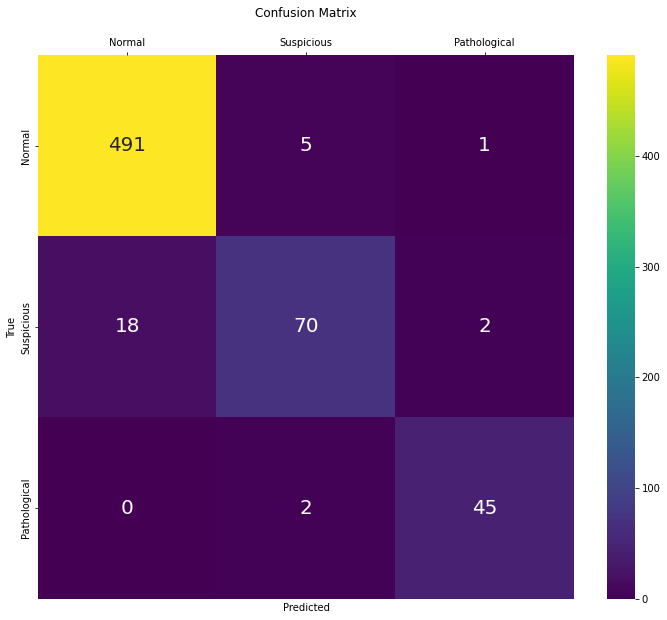

In [82]:
heat_confmatrix(confmatrix)